##### RGB, HSV, Grayscale

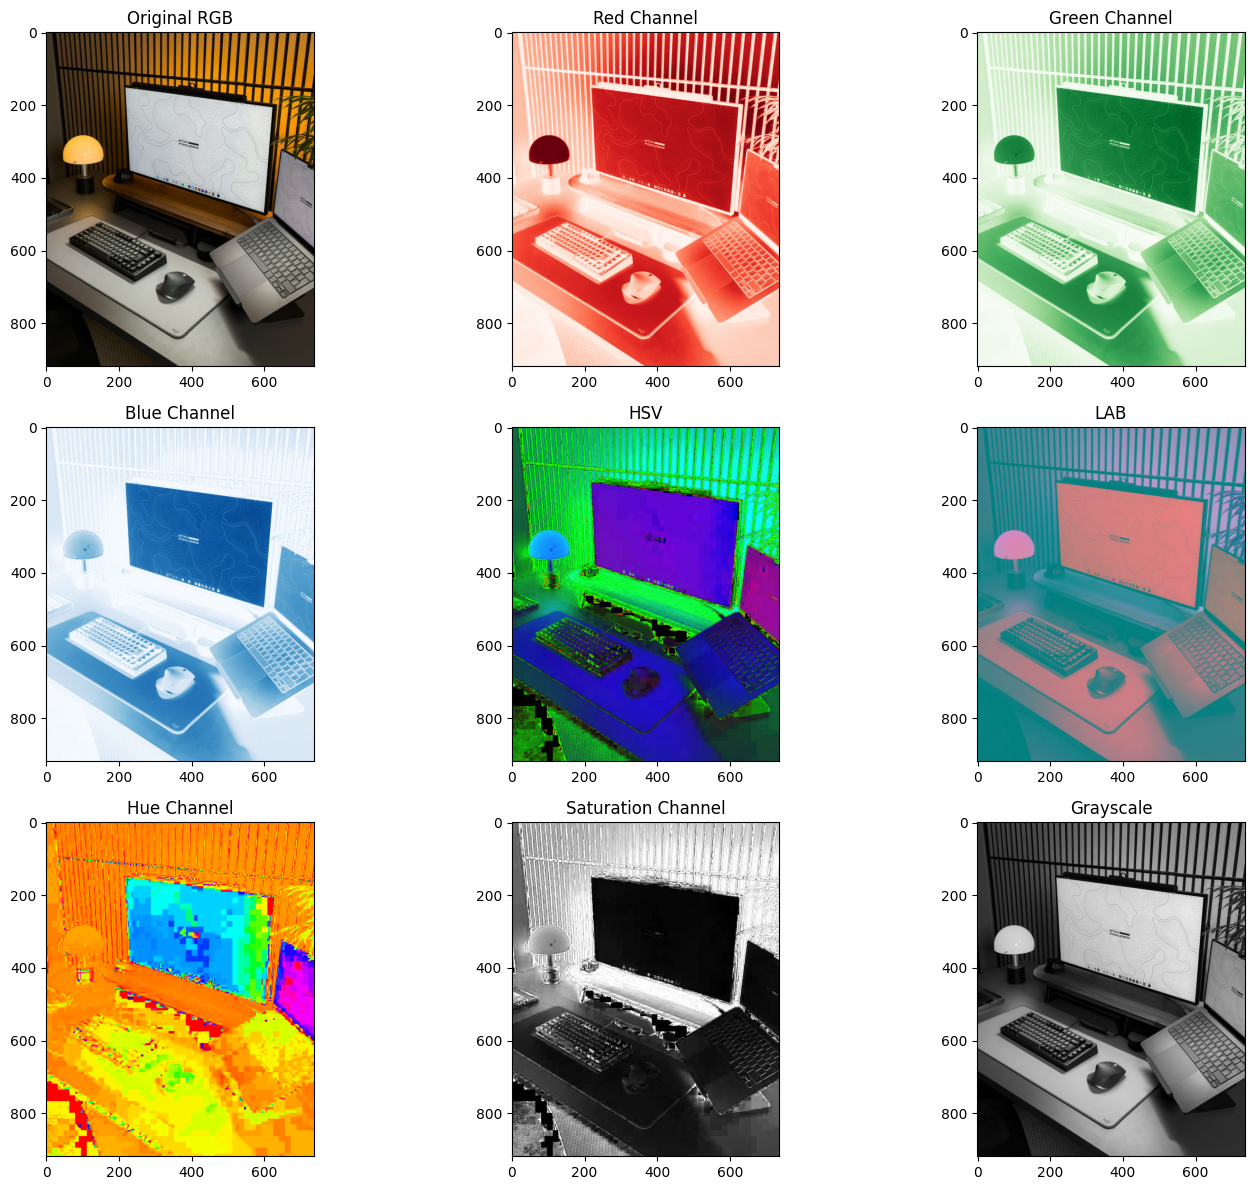

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('image.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

r_channel = img_rgb[:,:,0]
g_channel = img_rgb[:,:,1]
b_channel = img_rgb[:,:,2]

h_channel = img_hsv[:,:,0]  # Hue (Màu sắc)
s_channel = img_hsv[:,:,1]  # Saturation (Độ bão hòa)
v_channel = img_hsv[:,:,2]  # Value (Độ sáng)


fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# RGB and channels
axes[0,0].imshow(img_rgb)
axes[0,0].set_title('Original RGB')
axes[0,1].imshow(r_channel, cmap='Reds')
axes[0,1].set_title('Red Channel')
axes[0,2].imshow(g_channel, cmap='Greens')
axes[0,2].set_title('Green Channel')

# Blue channel, HSV, LAB
axes[1,0].imshow(b_channel, cmap='Blues')
axes[1,0].set_title('Blue Channel')
axes[1,1].imshow(img_hsv)
axes[1,1].set_title('HSV')
axes[1,2].imshow(img_lab)
axes[1,2].set_title('LAB')

# HSV channels và Grayscale
axes[2,0].imshow(h_channel, cmap='hsv')
axes[2,0].set_title('Hue Channel')
axes[2,1].imshow(s_channel, cmap='gray')
axes[2,1].set_title('Saturation Channel')
axes[2,2].imshow(img_gray, cmap='gray')
axes[2,2].set_title('Grayscale')

plt.tight_layout()
plt.show()

##### Histogram Equalization

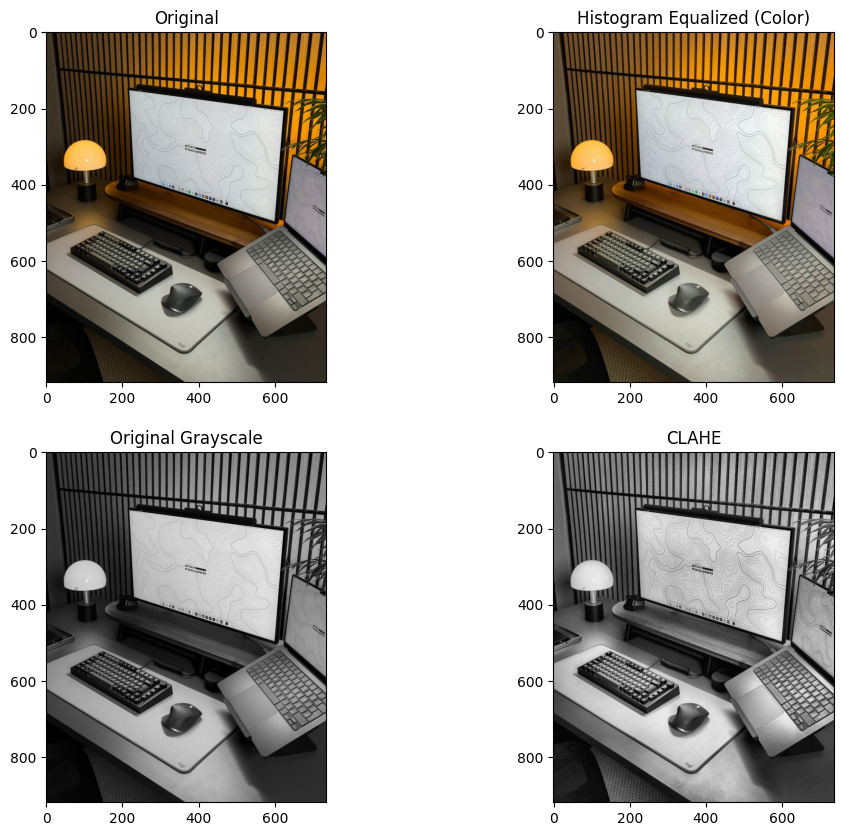

In [5]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
equalized_gray = cv2.equalizeHist(img_gray)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_gray = clahe.apply(img_gray)

# Histogram Equalization to HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_hsv[:,:,2] = cv2.equalizeHist(img_hsv[:,:,2])  # Equalize V channel
equalized_color = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0,0].imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
axes[0,0].set_title('Original')
axes[0,1].imshow(equalized_color)
axes[0,1].set_title('Histogram Equalized (Color)')
axes[1,0].imshow(img_gray, cmap='gray')
axes[1,0].set_title('Original Grayscale')
axes[1,1].imshow(clahe_gray, cmap='gray')
axes[1,1].set_title('CLAHE')
plt.show()